# Imports

In [10]:
import numpy as np
import pandas as pd
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load the dataset

In [2]:
X, y = fetch_california_housing(as_frame=True, return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=42)

# Create the Data Matrix

In [4]:
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost Regressor

In [6]:
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.1,
    'max_depth':5
}

In [7]:
xgb_model = xgb.train(
    params,
    train_dmatrix,
    num_boost_round=100, 
    early_stopping_rounds=10, 
    verbose_eval=True,
    evals=[(test_dmatrix, 'Test')]
)

[0]	Test-rmse:1.07621
[1]	Test-rmse:1.01608
[2]	Test-rmse:0.96218
[3]	Test-rmse:0.91447
[4]	Test-rmse:0.87394
[5]	Test-rmse:0.83783
[6]	Test-rmse:0.80567
[7]	Test-rmse:0.77884
[8]	Test-rmse:0.75579
[9]	Test-rmse:0.73434
[10]	Test-rmse:0.71537
[11]	Test-rmse:0.70032
[12]	Test-rmse:0.68426
[13]	Test-rmse:0.67334
[14]	Test-rmse:0.66108
[15]	Test-rmse:0.64994
[16]	Test-rmse:0.64126
[17]	Test-rmse:0.63376
[18]	Test-rmse:0.62665
[19]	Test-rmse:0.61974
[20]	Test-rmse:0.61158
[21]	Test-rmse:0.60539
[22]	Test-rmse:0.59938
[23]	Test-rmse:0.59199
[24]	Test-rmse:0.58674
[25]	Test-rmse:0.58032
[26]	Test-rmse:0.57709
[27]	Test-rmse:0.57328
[28]	Test-rmse:0.56845
[29]	Test-rmse:0.56545
[30]	Test-rmse:0.56261
[31]	Test-rmse:0.55595
[32]	Test-rmse:0.55459
[33]	Test-rmse:0.55089
[34]	Test-rmse:0.54913
[35]	Test-rmse:0.54723
[36]	Test-rmse:0.54191
[37]	Test-rmse:0.53906
[38]	Test-rmse:0.53721
[39]	Test-rmse:0.53520
[40]	Test-rmse:0.53311
[41]	Test-rmse:0.53201
[42]	Test-rmse:0.53084
[43]	Test-rmse:0.5297

In [8]:
y_predict = xgb_model.predict(test_dmatrix)

# Model Evaluation

In [11]:
rmse = mean_squared_error(y_test, y_predict, squared=False)

In [13]:
r2 = r2_score(y_test, y_predict)

In [14]:
r2

0.8168667210987989

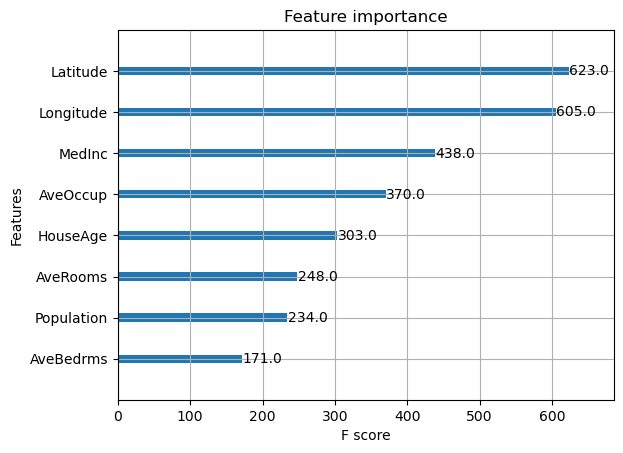

In [16]:
xgb.plot_importance(xgb_model)

plt.show()